In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
genres = list(os.listdir('./Data/Audio_Spotify/'))
genres

['blues',
 'classical',
 'country',
 'disco',
 'hip-hop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [3]:
dataset = pd.read_csv('./Data/dataset_30s.csv')
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393787,0.087182,0.234816,0.003927,2568.307499,908447.637465,2330.603569,308715.577317,5218.125973,3.324585e+06,...,39.830200,-3.842501,25.226437,1.177842,43.342216,-1.249235,29.951370,1.572441,38.711090,blues
1,0.309228,0.078714,0.216353,0.000593,2600.526333,119196.387617,2443.648191,52335.642025,5289.614525,5.345047e+05,...,36.337067,-4.838069,50.960033,0.480835,60.526500,-1.033996,53.779663,5.962861,47.731586,blues
2,0.405172,0.086719,0.429499,0.004212,2271.499361,80010.417414,2376.136834,45129.749993,4831.369457,5.185533e+05,...,37.245520,-0.221989,42.063286,3.477589,35.416004,-2.777307,44.057300,-2.155209,51.100945,blues
3,0.396727,0.085980,0.181729,0.001587,2021.513745,291015.331420,2292.529053,140282.438005,4485.021343,1.434883e+06,...,35.452095,-5.121627,34.954536,-0.388136,35.128887,-6.094978,41.395990,-0.616743,39.143930,blues
4,0.384360,0.089671,0.168010,0.003841,1786.248447,588557.866952,2036.880438,180689.226005,3725.874996,2.421118e+06,...,62.142754,-7.931910,81.215675,1.515552,83.688510,-9.566704,80.139990,3.714970,117.531660,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.352886,0.082492,0.097767,0.001024,2718.046882,242561.038323,2790.082047,54226.857927,6143.565845,7.534505e+05,...,37.172832,-8.038107,44.030760,-3.210631,53.193657,-8.474355,27.246414,-1.559889,36.777206,rock
4996,0.454385,0.075989,0.298701,0.005006,2088.257443,388406.218894,2332.392462,143767.430553,4519.213715,1.881966e+06,...,40.461490,-3.759503,30.834387,2.097388,31.971777,-5.161651,33.708570,0.999176,28.095938,rock
4997,0.399682,0.081606,0.093410,0.000688,2465.640992,385278.245867,2740.928117,123338.208536,5777.417278,2.036902e+06,...,37.003044,-7.095855,30.400803,0.539259,34.494102,-4.854610,32.684437,-2.667998,37.412130,rock
4998,0.432692,0.080612,0.250857,0.002745,2427.781521,491477.656612,2294.680156,186329.886563,4933.744698,1.900688e+06,...,45.416557,-3.517125,44.648530,0.888174,43.093100,-2.228872,57.131500,1.121721,90.240920,rock


In [4]:
dataset_test = pd.read_csv('./Data/dataset_30s_test.csv')
dataset_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.319122,0.087824,0.183786,0.003381,1997.626721,507278.848679,2516.033109,169930.668987,4484.558716,2.867323e+06,...,68.527710,-7.302022,65.718280,-3.131617,62.227790,-4.912180,78.303590,-5.760708,80.917570,blues
1,0.413324,0.074290,0.297994,0.000992,2090.237818,488268.550118,2258.849304,218430.612294,4445.689602,2.170609e+06,...,29.832080,1.452762,38.382576,0.836495,43.594624,-1.411472,47.466210,0.019044,47.956880,blues
2,0.379405,0.095306,0.224412,0.007175,1958.778858,555395.725468,2207.839987,218079.804127,4157.851238,2.480054e+06,...,78.780920,-2.074422,76.096100,5.387124,96.660620,0.261547,74.879030,5.215324,84.190810,blues
3,0.367253,0.086017,0.106235,0.000671,2409.672192,260834.328810,2354.900837,102613.635025,4846.619339,1.176520e+06,...,46.113970,-8.683642,44.685670,-2.165713,47.102547,-4.171875,47.968770,-3.042764,46.269330,blues
4,0.389526,0.084755,0.136514,0.000451,2114.692813,120091.025302,2535.204258,64304.886059,4803.771629,1.061024e+06,...,27.287556,-7.918742,38.057700,-0.321443,26.927868,-2.219746,58.392630,-0.984944,57.556774,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.388218,0.088828,0.295492,0.010067,2257.021099,324411.755475,2532.235061,160152.980459,5092.535248,1.792954e+06,...,85.227800,-0.345338,69.976450,3.399858,80.884170,2.678395,68.391830,0.166715,78.375100,rock
2996,0.340525,0.089080,0.173314,0.003613,2591.281176,323267.570545,2490.227611,71556.093156,5324.378872,1.159489e+06,...,72.047140,-5.045493,51.545795,2.036889,45.651360,-2.900739,50.328808,0.164409,60.613274,rock
2997,0.351606,0.082311,0.148330,0.000756,1942.741661,258663.718295,2185.302142,136179.644692,3996.377449,1.505208e+06,...,48.891567,-3.980361,53.653126,1.885155,57.417700,-4.050878,47.113950,-3.021099,66.095250,rock
2998,0.331801,0.095144,0.132227,0.003906,1610.970675,600641.056442,2049.981888,311477.973182,3342.508278,3.223770e+06,...,92.875336,-6.229543,119.393800,3.623092,153.420320,-3.739088,159.045010,2.380703,205.144680,rock


In [2]:
dataset = pd.read_csv('./Data/dataset_3s.csv')
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393473,0.082610,0.267423,0.001508,2996.055014,141590.967082,2636.061695,33113.316727,6077.995042,6.126895e+05,...,21.054934,-1.374886,18.093039,3.500433,36.096550,-2.891514,21.235708,1.027937,28.678877,blues
1,0.395950,0.082850,0.230470,0.003651,3278.310810,209089.061929,2699.376218,42771.978127,6496.567383,7.640368e+05,...,39.322002,-3.120579,24.227040,-2.353049,29.533842,1.234837,28.241436,5.982852,35.542750,blues
2,0.382327,0.082610,0.256132,0.003969,3162.625680,288376.349014,2737.596716,37655.814294,6454.246357,8.719234e+05,...,40.757156,-2.201047,15.235726,-0.696906,45.238758,0.068427,39.017270,2.181138,36.891100,blues
3,0.405079,0.086607,0.252109,0.002799,3225.459650,201993.061711,2672.451490,33680.188992,6403.477689,7.303335e+05,...,41.793922,-2.570577,34.115192,-1.213191,39.187050,-3.190201,34.042150,2.137327,34.298935,blues
4,0.359842,0.089357,0.257238,0.002974,3181.829395,206791.140064,2674.925693,38851.897035,6346.828801,7.371374e+05,...,43.675007,-2.602283,23.351952,-2.295934,44.347910,-1.463411,40.890038,1.362682,90.870240,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44992,0.474000,0.073201,0.202014,0.000600,2151.775369,66140.741408,2282.972145,29257.234313,4202.784330,3.692896e+05,...,22.304995,-8.317896,24.048977,-1.103306,18.414278,-4.729356,15.871642,-1.332469,22.803463,rock
44993,0.456639,0.070778,0.199698,0.000751,2264.812762,146385.804846,2411.558378,51053.166277,4581.188965,1.047314e+06,...,24.109673,-6.560095,16.672546,-1.162655,14.003501,-7.199890,21.884212,-5.783022,29.038536,rock
44994,0.503847,0.067048,0.208297,0.000766,2078.803283,119754.584365,2214.667679,65290.415358,4147.791842,5.816585e+05,...,26.265207,-5.014420,21.301147,1.930129,26.793062,-2.381448,28.342682,-1.176929,14.468789,rock
44995,0.483628,0.067222,0.201220,0.000687,2187.380939,76503.976810,2251.850177,37829.858650,4166.923265,5.258483e+05,...,21.239422,-6.954725,19.004562,-1.203307,19.378622,-4.852025,39.834790,-2.572295,16.306948,rock


In [3]:
dataset_test = pd.read_csv('./Data/dataset_3s_test.csv')
dataset_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.307984,0.089053,0.190690,0.002646,1855.556469,287777.538918,2391.100241,161103.120886,4127.997859,1.989934e+06,...,77.599640,-4.542606,61.937252,-3.932773,62.426810,-1.484993,80.424930,-3.339223,55.697910,blues
1,0.279656,0.086663,0.224442,0.003508,2331.682901,703041.024364,2576.018663,152009.903625,5035.042631,3.071346e+06,...,66.199684,-8.786604,86.288660,0.214903,57.659977,-4.564174,86.595330,-9.251290,97.936750,blues
2,0.367939,0.085713,0.148428,0.001889,1768.096454,347938.706350,2408.696100,155769.478882,4003.353741,2.515403e+06,...,57.839060,-7.233996,61.636654,-3.435822,60.428710,-1.923204,90.766260,-6.019916,37.164673,blues
3,0.331417,0.085185,0.150427,0.002396,2126.327903,802242.452874,2719.856207,165818.798309,4959.924880,3.308570e+06,...,60.101303,-8.261600,61.020190,-4.553399,37.856940,-8.554906,70.657280,-2.676727,83.601585,blues
4,0.350183,0.086096,0.174069,0.002595,2086.750522,472072.498946,2574.681244,87442.633368,4629.555852,2.048728e+06,...,39.345734,-5.538837,56.535984,-2.157206,42.778160,-8.291990,71.989426,-5.623352,41.109646,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26993,0.376556,0.096085,0.205589,0.010609,2092.383330,716082.149195,2349.218821,238683.872687,4514.518855,3.656434e+06,...,22.943243,0.977130,87.888420,2.091772,95.896530,-2.409563,43.447550,-1.469488,88.334404,rock
26994,0.349721,0.082393,0.177508,0.001299,2493.667466,538270.246419,2748.701975,136275.572946,5625.880596,1.951000e+06,...,29.332285,-8.418276,65.532974,0.725348,143.340000,3.311851,42.278410,7.951228,102.514520,rock
26995,0.338353,0.084963,0.174393,0.001438,2456.949555,222887.830521,2796.956345,61009.457242,5685.759465,1.148710e+06,...,28.992634,-15.010466,31.113743,-11.433256,31.748632,-7.260241,31.623430,7.425103,32.479546,rock
26996,0.343133,0.085416,0.171384,0.001990,2311.484926,250557.411454,2689.333759,81143.983461,5417.256986,1.141830e+06,...,172.451420,-3.496891,94.891850,-0.821825,115.845120,-9.533541,134.196410,-6.962632,104.834236,rock


In [4]:
dataset = pd.concat([dataset, dataset_test])
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393473,0.082610,0.267423,0.001508,2996.055014,141590.967082,2636.061695,33113.316727,6077.995042,6.126895e+05,...,21.054934,-1.374886,18.093039,3.500433,36.096550,-2.891514,21.235708,1.027937,28.678877,blues
1,0.395950,0.082850,0.230470,0.003651,3278.310810,209089.061929,2699.376218,42771.978127,6496.567383,7.640368e+05,...,39.322002,-3.120579,24.227040,-2.353049,29.533842,1.234837,28.241436,5.982852,35.542750,blues
2,0.382327,0.082610,0.256132,0.003969,3162.625680,288376.349014,2737.596716,37655.814294,6454.246357,8.719234e+05,...,40.757156,-2.201047,15.235726,-0.696906,45.238758,0.068427,39.017270,2.181138,36.891100,blues
3,0.405079,0.086607,0.252109,0.002799,3225.459650,201993.061711,2672.451490,33680.188992,6403.477689,7.303335e+05,...,41.793922,-2.570577,34.115192,-1.213191,39.187050,-3.190201,34.042150,2.137327,34.298935,blues
4,0.359842,0.089357,0.257238,0.002974,3181.829395,206791.140064,2674.925693,38851.897035,6346.828801,7.371374e+05,...,43.675007,-2.602283,23.351952,-2.295934,44.347910,-1.463411,40.890038,1.362682,90.870240,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26993,0.376556,0.096085,0.205589,0.010609,2092.383330,716082.149195,2349.218821,238683.872687,4514.518855,3.656434e+06,...,22.943243,0.977130,87.888420,2.091772,95.896530,-2.409563,43.447550,-1.469488,88.334404,rock
26994,0.349721,0.082393,0.177508,0.001299,2493.667466,538270.246419,2748.701975,136275.572946,5625.880596,1.951000e+06,...,29.332285,-8.418276,65.532974,0.725348,143.340000,3.311851,42.278410,7.951228,102.514520,rock
26995,0.338353,0.084963,0.174393,0.001438,2456.949555,222887.830521,2796.956345,61009.457242,5685.759465,1.148710e+06,...,28.992634,-15.010466,31.113743,-11.433256,31.748632,-7.260241,31.623430,7.425103,32.479546,rock
26996,0.343133,0.085416,0.171384,0.001990,2311.484926,250557.411454,2689.333759,81143.983461,5417.256986,1.141830e+06,...,172.451420,-3.496891,94.891850,-0.821825,115.845120,-9.533541,134.196410,-6.962632,104.834236,rock


In [5]:
X = dataset.loc[:, dataset.columns != 'label']
Y = dataset['label']

In [6]:
# Normalize X
cols = X.columns
scaler = MinMaxScaler()
scaled_input = scaler.fit_transform(X)
X = pd.DataFrame(scaled_input, columns=cols)

pca = PCA()
principalComponents = pca.fit_transform(X)
principalComponents.shape

(71995, 63)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, random_state=42, stratify=Y, test_size=0.2)
X_train

array([[-2.57035133e-01, -2.77409049e-01,  1.20581359e-02, ...,
         4.20313893e-05, -2.50068719e-03, -3.14373704e-03],
       [ 7.17188291e-02, -1.60364317e-01,  3.48155733e-02, ...,
         1.63118012e-03,  1.83362593e-03,  1.05291771e-03],
       [ 2.67713561e-01, -2.51826887e-01,  2.23364456e-02, ...,
         1.47943758e-04,  1.57337750e-04,  1.35172838e-03],
       ...,
       [-2.24547922e-02,  1.30314271e-01, -1.92426851e-01, ...,
        -2.95147115e-03, -3.57220318e-04,  2.95884634e-04],
       [ 4.38070143e-01, -1.33164534e-01, -2.06759198e-01, ...,
        -3.82650519e-02,  7.37649316e-03,  7.47181080e-04],
       [-2.41765672e-01, -2.88240913e-01,  1.04016045e-01, ...,
         2.77767682e-03,  2.83874140e-03, -5.62000380e-04]])

# KNN

In [8]:
pipeline = Pipeline([('knn', KNeighborsClassifier())])

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Best parameters: {'knn__n_neighbors': 5}
Best score: 0.7416140091009058


In [9]:
model.score(X_test, Y_test)

0.7568581151468852

In [13]:
Y_pred = model.predict(X_test)
Y_pred

array(['reggae', 'jazz', 'rock', ..., 'jazz', 'jazz', 'hip-hop'],
      dtype=object)

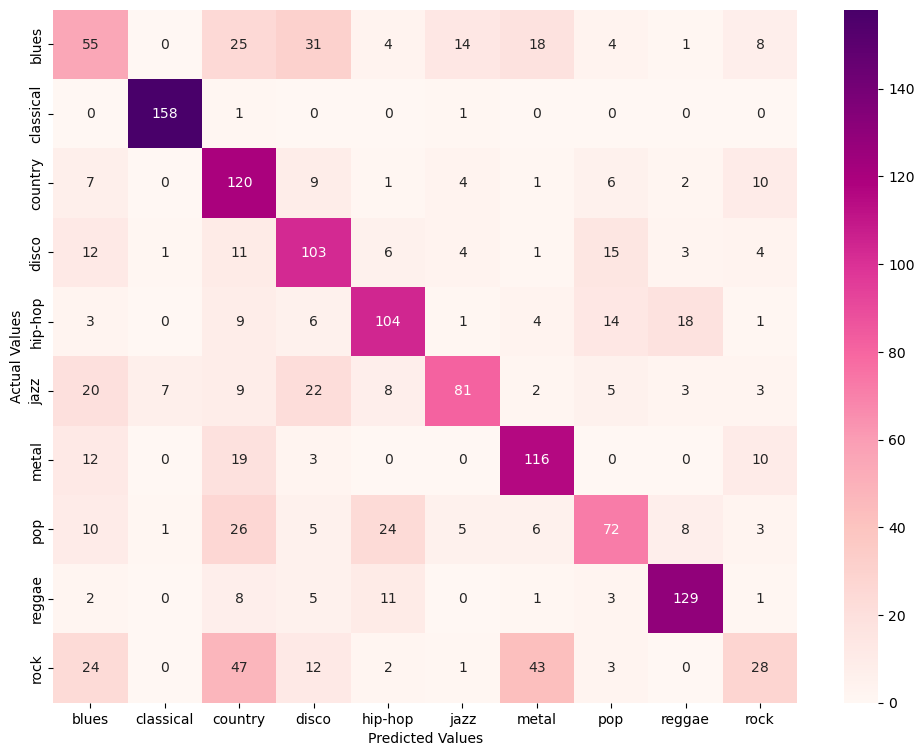

In [14]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./KNN_confusion_matrix.png', bbox_inches='tight')

In [15]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.38      0.34      0.36       160
   classical       0.95      0.99      0.97       160
     country       0.44      0.75      0.55       160
       disco       0.53      0.64      0.58       160
     hip-hop       0.65      0.65      0.65       160
        jazz       0.73      0.51      0.60       160
       metal       0.60      0.72      0.66       160
         pop       0.59      0.45      0.51       160
      reggae       0.79      0.81      0.80       160
        rock       0.41      0.17      0.25       160

    accuracy                           0.60      1600
   macro avg       0.61      0.60      0.59      1600
weighted avg       0.61      0.60      0.59      1600



# SVM

In [16]:
pipeline = Pipeline([('svm', SVC())])

param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best score: 0.6524999999999999


In [17]:
model.score(X_test, Y_test)

0.671875

In [18]:
Y_pred = model.predict(X_test)
Y_pred

array(['reggae', 'jazz', 'rock', ..., 'jazz', 'jazz', 'pop'], dtype=object)

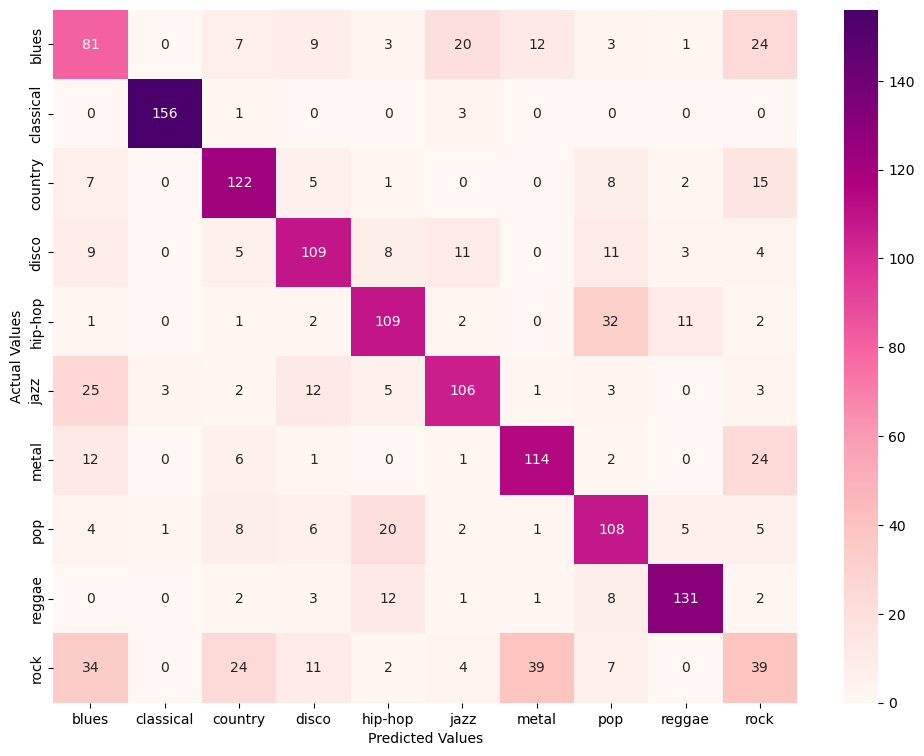

In [19]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./SVM_confusion_matrix.png', bbox_inches='tight')

In [20]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.47      0.51      0.49       160
   classical       0.97      0.97      0.97       160
     country       0.69      0.76      0.72       160
       disco       0.69      0.68      0.69       160
     hip-hop       0.68      0.68      0.68       160
        jazz       0.71      0.66      0.68       160
       metal       0.68      0.71      0.70       160
         pop       0.59      0.68      0.63       160
      reggae       0.86      0.82      0.84       160
        rock       0.33      0.24      0.28       160

    accuracy                           0.67      1600
   macro avg       0.67      0.67      0.67      1600
weighted avg       0.67      0.67      0.67      1600



# Random Forest

In [20]:
pipeline = Pipeline([('rf', RandomForestClassifier())])

param_grid = {
    'rf__n_estimators': [100, 150, 200, 250],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 250}
Best score: 0.5986


In [21]:
model.score(X_test, Y_test)

0.349

In [22]:
Y_pred = model.predict(X_test)
Y_pred

array(['blues', 'metal', 'disco', ..., 'blues', 'reggae', 'blues'],
      dtype=object)

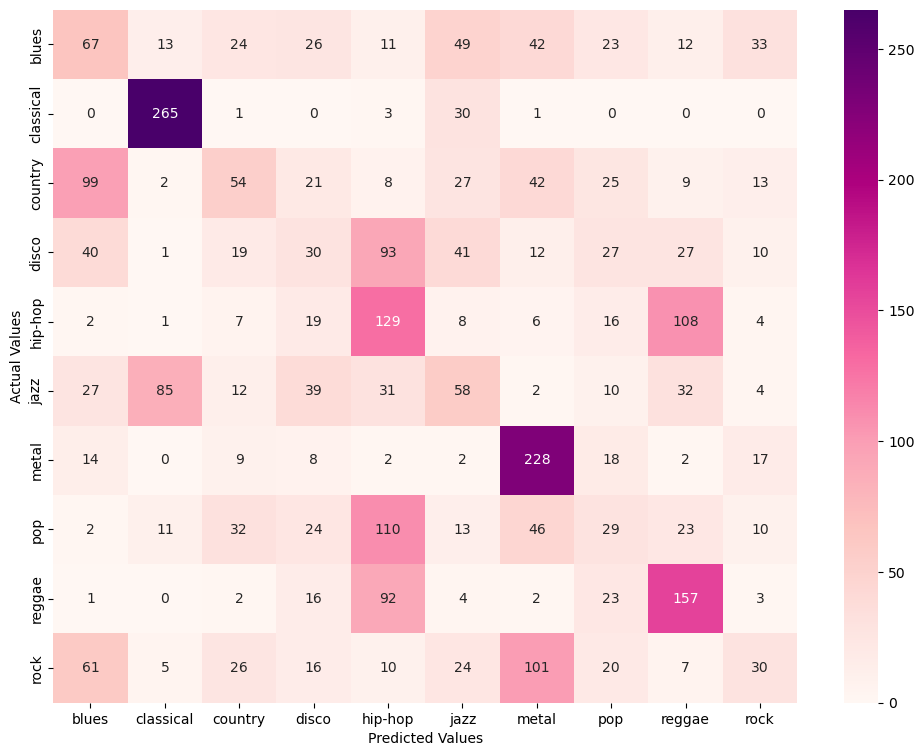

In [23]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./RandomForest_confusion_matrix.png', bbox_inches='tight')

In [24]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.21      0.22      0.22       300
   classical       0.69      0.88      0.78       300
     country       0.29      0.18      0.22       300
       disco       0.15      0.10      0.12       300
     hip-hop       0.26      0.43      0.33       300
        jazz       0.23      0.19      0.21       300
       metal       0.47      0.76      0.58       300
         pop       0.15      0.10      0.12       300
      reggae       0.42      0.52      0.46       300
        rock       0.24      0.10      0.14       300

    accuracy                           0.35      3000
   macro avg       0.31      0.35      0.32      3000
weighted avg       0.31      0.35      0.32      3000



# Logistic Regression

In [26]:
pipeline = Pipeline([('logreg', LogisticRegression())])

param_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logreg__C': [1e-4, 1e-2, 1, 1e2],
    'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\prico\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prico\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prico\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\prico\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py"

Best parameters: {'logreg__C': 100.0, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best score: 0.6275999999999999


In [27]:
model.score(X_test, Y_test)

0.30566666666666664

In [28]:
Y_pred = model.predict(X_test)
Y_pred

array(['blues', 'disco', 'pop', ..., 'blues', 'jazz', 'hip-hop'],
      dtype=object)

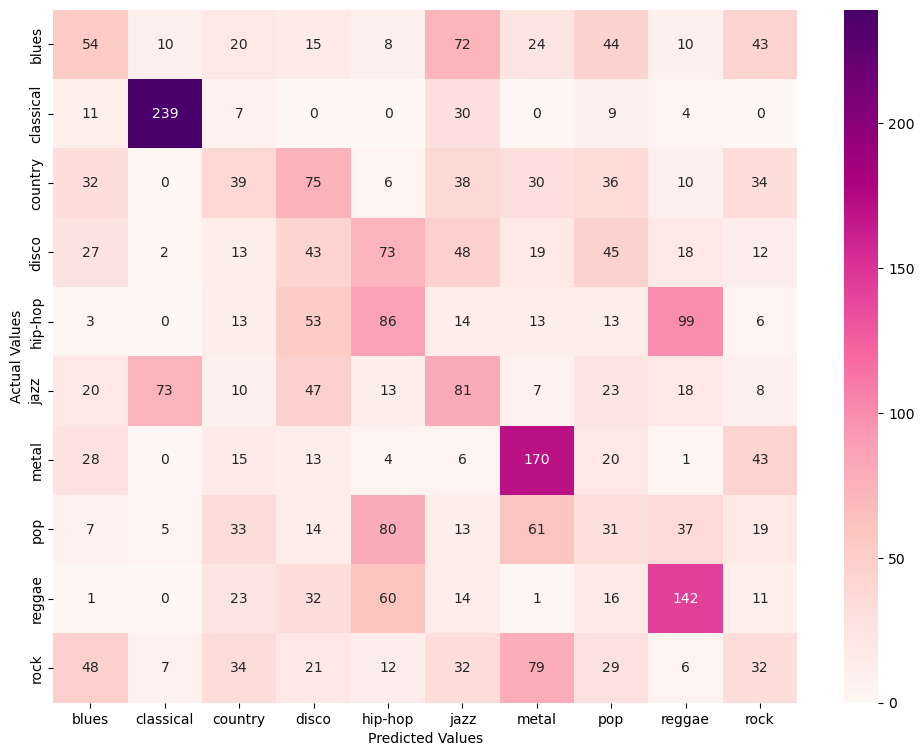

In [29]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./LogisticRegression_confusion_matrix.png', bbox_inches='tight')

In [30]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.23      0.18      0.20       300
   classical       0.71      0.80      0.75       300
     country       0.19      0.13      0.15       300
       disco       0.14      0.14      0.14       300
     hip-hop       0.25      0.29      0.27       300
        jazz       0.23      0.27      0.25       300
       metal       0.42      0.57      0.48       300
         pop       0.12      0.10      0.11       300
      reggae       0.41      0.47      0.44       300
        rock       0.15      0.11      0.13       300

    accuracy                           0.31      3000
   macro avg       0.29      0.31      0.29      3000
weighted avg       0.29      0.31      0.29      3000



# Naive Bayes

In [31]:
pipeline = Pipeline([('nb', GaussianNB())])

param_grid = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'nb__var_smoothing': 1e-06}
Best score: 0.5008


In [32]:
model.score(X_test, Y_test)

0.298

In [33]:
Y_pred = model.predict(X_test)
Y_pred

array(['blues', 'metal', 'disco', ..., 'blues', 'jazz', 'blues'],
      dtype='<U9')

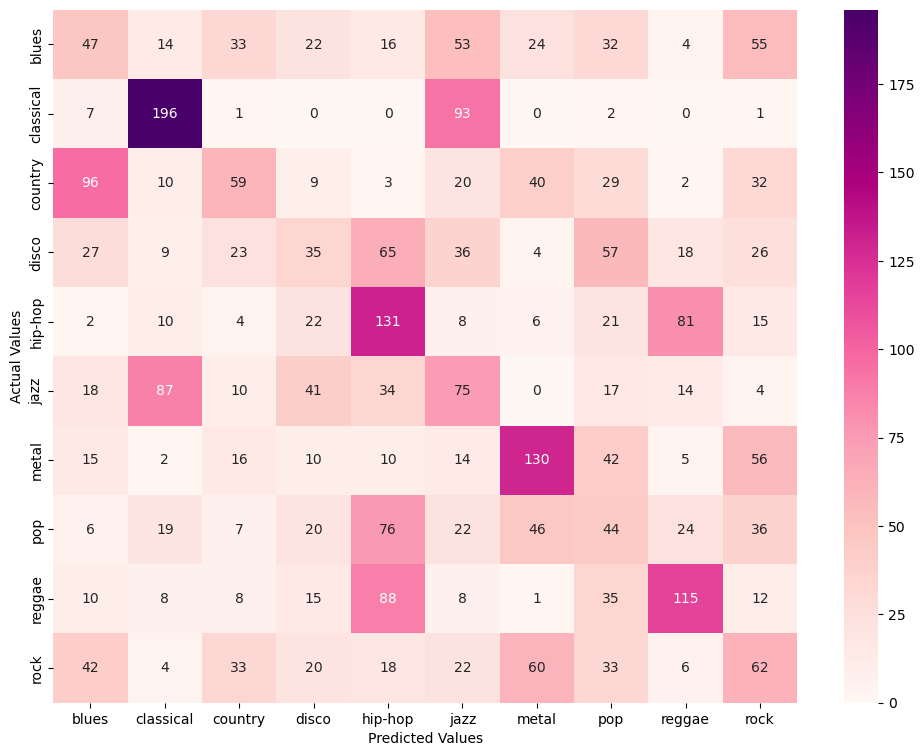

In [34]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./NaiveBayes_confusion_matrix.png', bbox_inches='tight')

In [35]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.17      0.16      0.16       300
   classical       0.55      0.65      0.59       300
     country       0.30      0.20      0.24       300
       disco       0.18      0.12      0.14       300
     hip-hop       0.30      0.44      0.35       300
        jazz       0.21      0.25      0.23       300
       metal       0.42      0.43      0.43       300
         pop       0.14      0.15      0.14       300
      reggae       0.43      0.38      0.40       300
        rock       0.21      0.21      0.21       300

    accuracy                           0.30      3000
   macro avg       0.29      0.30      0.29      3000
weighted avg       0.29      0.30      0.29      3000



# XGBoost

In [44]:
encoder = LabelEncoder()
encoder.fit_transform(Y_train)

array([0, 0, 0, ..., 9, 9, 9])

In [45]:
pipeline = Pipeline([('xgb', XGBClassifier())])

param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.1, 0.01, 0.001]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, encoder.fit_transform(Y_train))

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best score: 0.6028


In [49]:
model.score(X_test, encoder.fit_transform(Y_test))

0.3536666666666667

In [50]:
Y_pred = model.predict(X_test)
Y_pred

array([5, 6, 7, ..., 0, 5, 9], dtype=int64)

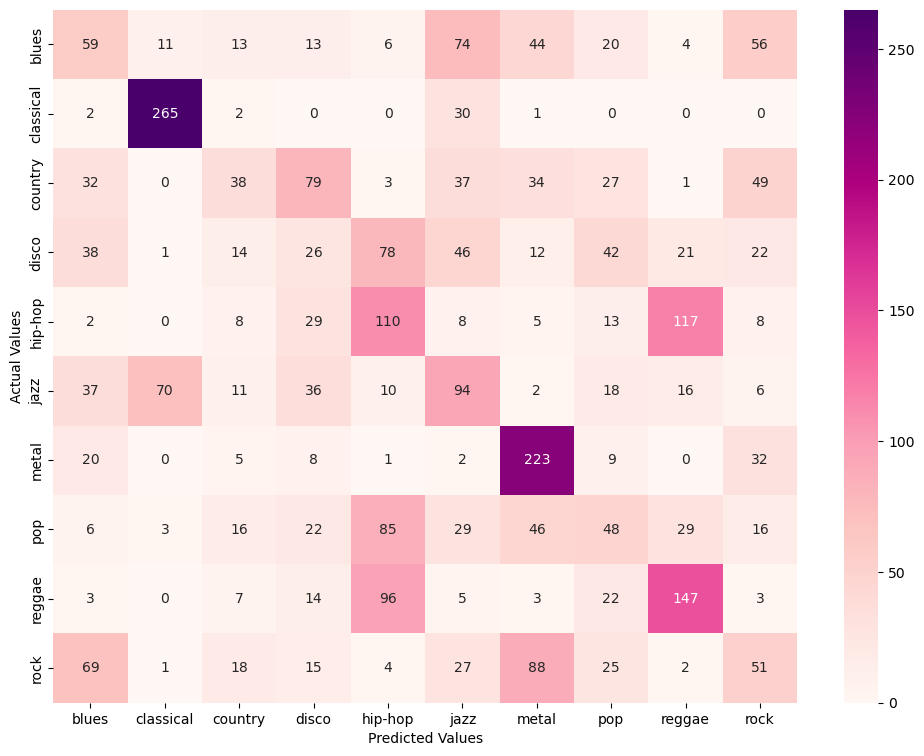

In [51]:
cm = confusion_matrix(encoder.fit_transform(Y_test), Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./XGB_confusion_matrix.png', bbox_inches='tight')

In [53]:
print(classification_report(encoder.fit_transform(Y_test), Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.22      0.20      0.21       300
   classical       0.75      0.88      0.81       300
     country       0.29      0.13      0.18       300
       disco       0.11      0.09      0.10       300
     hip-hop       0.28      0.37      0.32       300
        jazz       0.27      0.31      0.29       300
       metal       0.49      0.74      0.59       300
         pop       0.21      0.16      0.18       300
      reggae       0.44      0.49      0.46       300
        rock       0.21      0.17      0.19       300

    accuracy                           0.35      3000
   macro avg       0.33      0.35      0.33      3000
weighted avg       0.33      0.35      0.33      3000



### Feature importance:

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

In [17]:
perm = PermutationImportance(model)
perm.fit(X_test, Y_test)
eli5.explain_weights_df(estimator=perm, feature_names=X.columns.tolist())

,feature,weight,std
0,chroma_stft_mean,0.244750,0.006067
1,chroma_stft_var,0.174125,0.006621
2,rms_mean,0.056125,0.003941
3,spectral_centroid_var,0.026625,0.002784
4,rms_var,0.025375,0.004412
...,...,...,...
58,mfcc_20_var,-0.000375,0.000637
59,mfcc_15_mean,-0.001125,0.001912
60,mfcc_6_var,-0.001375,0.003674
61,mfcc_17_var,-0.001500,0.002039


# Reinforcement Learning

### Ideas why it is not ideal, other supervised methods are more suited than this

### Reinforcement learning may be useful if the goal is to generate new music in a particular genre, but even in this case, it may not be the most effective approach. Generative models, such as variational autoencoders (VAEs) or generative adversarial networks (GANs), have been shown to be effective in generating new music in specific genres.